In [748]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
from statsmodels.tsa.seasonal import seasonal_decompose
import psutil

Download Raw Data

In [749]:
#CCY Collection
#for the selected ccy, the data is downloaded from yahoo finance

#Download data
DXY = ['DX-Y.NYB']
AUD = ['AUDUSD=X']
CAD = ['CADUSD=X']
CHF = ['CHFUSD=X']
EUR = ['EURUSD=X']
GBP = ['GBPUSD=X']
JPY = ['JPYUSD=X']
NZD = ['NZDUSD=X']
SEK = ['SEKUSD=X']
NOK = ['NOKUSD=X']
ZAR = ['ZARUSD=X']
TWD = ['TWDUSD=X']
JPY = ['JPYUSD=X']
KRW = ['KRWUSD=X']
SGD = ['SGDUSD=X']
HKD = ['HKDUSD=X']
CNY = ['CNYUSD=X']
INR = ['INRUSD=X']
THB = ['THBUSD=X']
VND = ['VNDUSD=X']

CCY = TWD
start_date = '1999-01-01'
end_date = pd.Timestamp(datetime.now()).strftime('%Y-%m-%d')

#selecting the outliers daily
data_daily = yf.download(CCY, start=start_date, end=end_date)['Adj Close']
q75, q25 = np.percentile(data_daily, [75 ,25])
iqr = q75 - q25
data_daily = data_daily[(data_daily >= q25 - 1 * iqr) & (data_daily <= q75 + 1 * iqr)]
returns_daily = data_daily.pct_change()
returns_daily = pd.DataFrame(returns_daily)

#selecting the outliers monthly
data_monthly = yf.download(CCY, start=start_date, end=end_date, interval= "1mo")['Adj Close']
q75, q25 = np.percentile(data_monthly, [75 ,25])
iqr = q75 - q25
data_monthly = data_monthly[(data_monthly >= q25 - 10 * iqr) & (data_monthly <= q75 + 10 * iqr)]
returns_monthly = data_monthly.pct_change()
returns_monthly = pd.DataFrame(returns_monthly)

#Get the seasonal components
data_monthly = pd.DataFrame(data_monthly)
data_monthly.index = pd.to_datetime(data_monthly.index)
selected_months = [3, 6, 9, 12]
data_quarterly = data_monthly[data_monthly.index.month.isin(selected_months)]
returns_quarterly = data_quarterly.pct_change()

[*********************100%%**********************]  1 of 1 completed
[*********************100%%**********************]  1 of 1 completed


CCY Time Series Chart

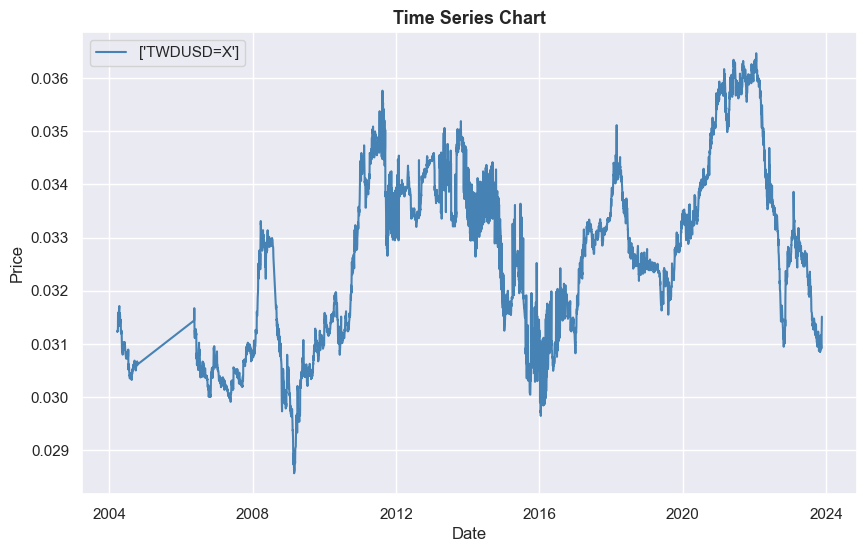

In [750]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
plt.plot(data_daily.index, data_daily, label=CCY, color='steelblue')
plt.title('Time Series Chart', fontsize=13, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

Time Series Trend Decomposition

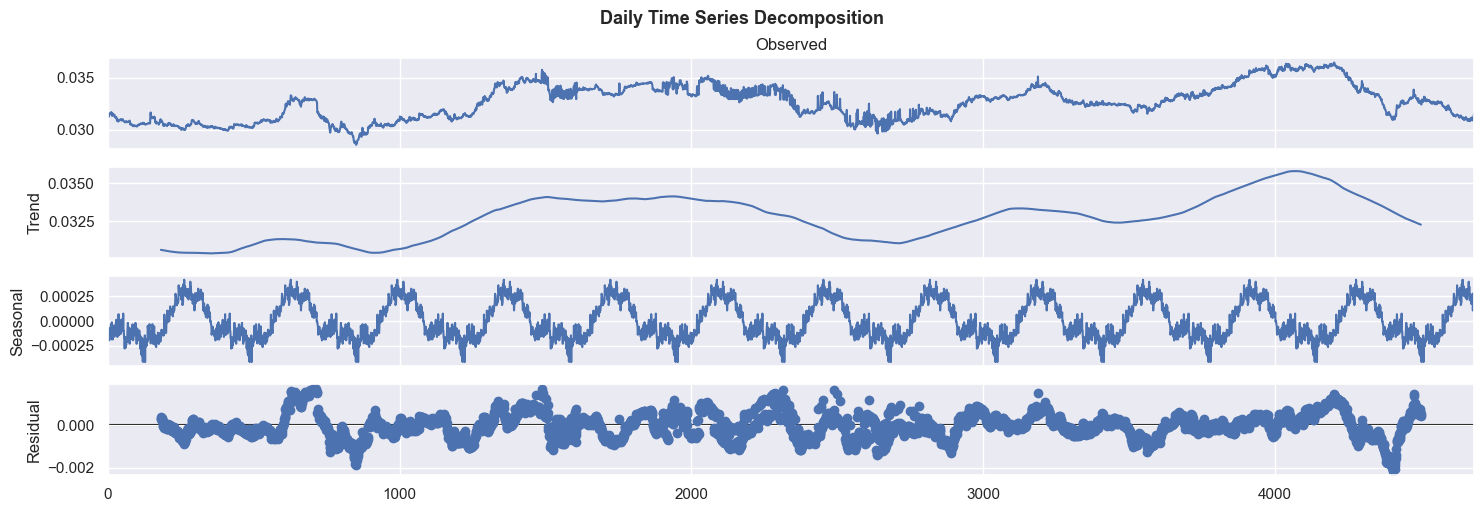

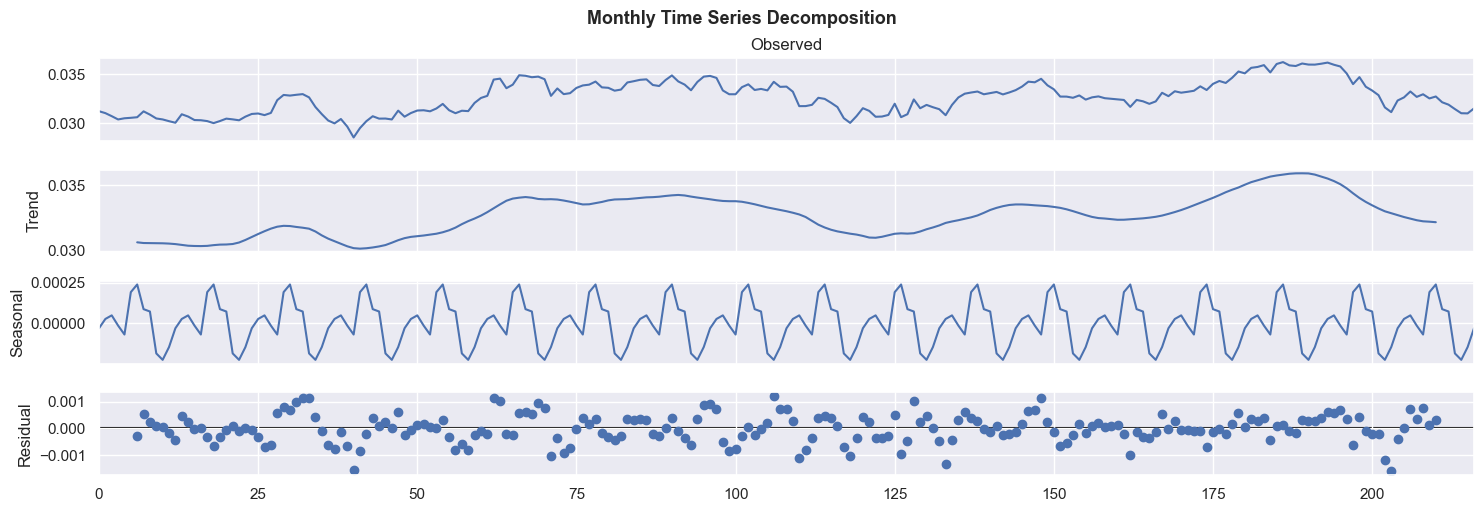

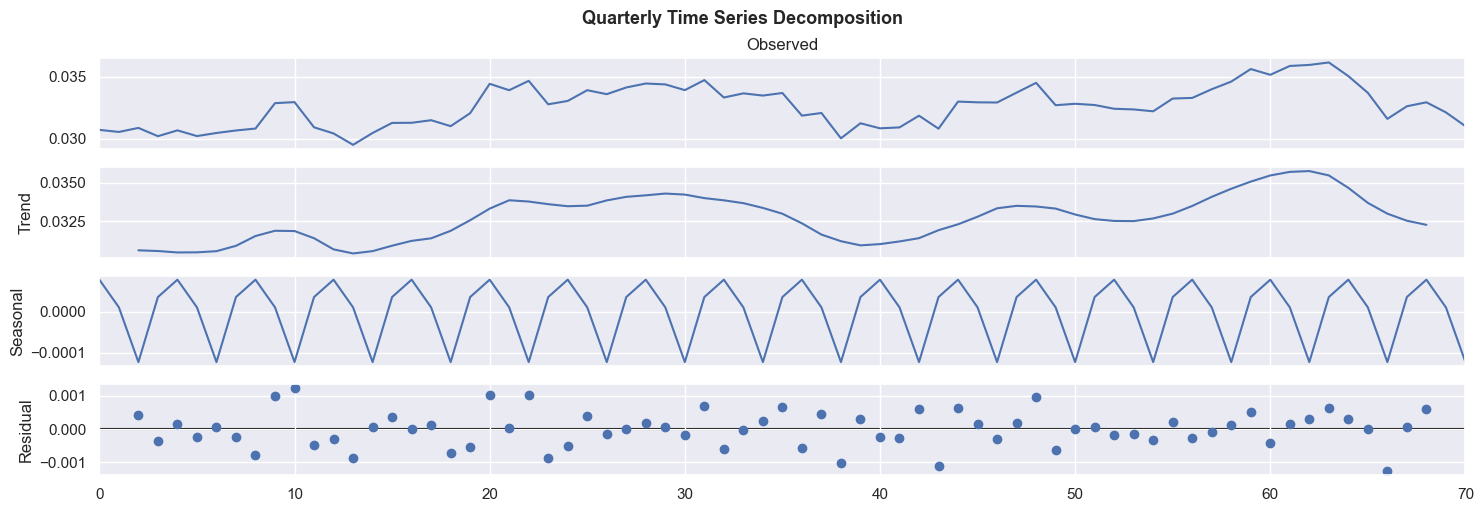

In [772]:
sns.set(style="darkgrid", rc={"figure.figsize": (15, 5)})

# Daily Time Series Decomposition
result_daily = seasonal_decompose(np.array(data_daily), model='additive', period=365)
result_daily.plot()
plt.suptitle("Daily Time Series Decomposition", fontsize=13, fontweight='bold', y=1.02 )
plt.show()

# Monthly Time Series Decomposition
result_monthly = seasonal_decompose(np.array(data_monthly), model='additive', period=12)
result_monthly.plot()
plt.suptitle("Monthly Time Series Decomposition", fontsize=13, fontweight='bold', y=1.02)
plt.show()

# Quarterly Time Series Decomposition
result_quarterly = seasonal_decompose(np.array(data_quarterly), model='additive', period=4)
result_quarterly.plot()
plt.suptitle("Quarterly Time Series Decomposition", fontsize=13, fontweight='bold', y=1.02)
plt.show()

Data Cleaning

In [752]:
#Define Quarterly Returns
DXY_Q1_returns = returns_quarterly[returns_quarterly.index.month == 3]
DXY_Q2_returns = returns_quarterly[returns_quarterly.index.month == 6]
DXY_Q3_returns = returns_quarterly[returns_quarterly.index.month == 9]
DXY_Q4_returns = returns_quarterly[returns_quarterly.index.month == 12]

suffix = ''
DXY_Q1_returns = DXY_Q1_returns.copy()
DXY_Q1_returns.rename(columns={'Adj Close': 'Q1'}, inplace=True)
DXY_Q1_returns.index = pd.to_datetime(DXY_Q1_returns.index)
DXY_Q1_returns.index = DXY_Q1_returns.index.strftime('%Y') + suffix

DXY_Q2_returns = DXY_Q2_returns.copy()
DXY_Q2_returns.rename(columns={'Adj Close': 'Q2'}, inplace=True)
DXY_Q2_returns.index = pd.to_datetime(DXY_Q2_returns.index)
DXY_Q2_returns.index = DXY_Q2_returns.index.strftime('%Y') + suffix

DXY_Q3_returns = DXY_Q3_returns.copy()
DXY_Q3_returns.rename(columns={'Adj Close': 'Q3'}, inplace=True)
DXY_Q3_returns.index = pd.to_datetime(DXY_Q3_returns.index)
DXY_Q3_returns.index = DXY_Q3_returns.index.strftime('%Y') + suffix

DXY_Q4_returns = DXY_Q4_returns.copy()
DXY_Q4_returns.rename(columns={'Adj Close': 'Q4'}, inplace=True)
DXY_Q4_returns.index = pd.to_datetime(DXY_Q4_returns.index)
DXY_Q4_returns.index = DXY_Q4_returns.index.strftime('%Y') + suffix

merged_returns_quarterly = pd.merge(DXY_Q1_returns, DXY_Q2_returns, left_index=True, right_index=True, how='outer', suffixes=('', suffix))
merged_returns_quarterly = pd.merge(merged_returns_quarterly, DXY_Q3_returns, left_index=True, right_index=True, how='outer', suffixes=('', suffix))
merged_returns_quarterly = pd.merge(merged_returns_quarterly, DXY_Q4_returns, left_index=True, right_index=True, how='outer', suffixes=('', suffix))
merged_returns_quarterly = merged_returns_quarterly.iloc[1:]
merged_returns_quarterly

,Q1,Q2,Q3,Q4
Date,,,,
2006,NaN,0.010594,-0.021547,0.015498
2007,-0.014964,0.008229,0.006627,0.005057
2008,0.066250,0.002538,-0.061469,-0.015982
2009,-0.030115,0.032307,0.026596,0.000313
2010,0.006616,-0.015203,0.033675,0.073691
2011,-0.014925,0.022191,-0.054426,0.008264
2012,0.026119,-0.009409,0.016046,0.009304
2013,-0.002063,-0.013401,0.023793,-0.040333
2014,0.009999,-0.005258,0.006200,NaN


In [753]:
avg_DXY_Q1_returns = DXY_Q1_returns.mean()
avg_DXY_Q2_returns = DXY_Q2_returns.mean()
avg_DXY_Q3_returns = DXY_Q3_returns.mean()
avg_DXY_Q4_returns = DXY_Q4_returns.mean()

med_DXY_Q1_returns = DXY_Q1_returns.median()
med_DXY_Q2_returns = DXY_Q2_returns.median()
med_DXY_Q3_returns = DXY_Q3_returns.median()
med_DXY_Q4_returns = DXY_Q4_returns.median()

data = {
    'Quarter': ['Q1', 'Q2', 'Q3', 'Q4'],
    'Average_Returns': [avg_DXY_Q1_returns.values, avg_DXY_Q2_returns.values, avg_DXY_Q3_returns.values, avg_DXY_Q4_returns.values],
    'Median_Returns': [med_DXY_Q1_returns.values, med_DXY_Q2_returns.values, med_DXY_Q3_returns.values, med_DXY_Q4_returns.values]
}
quarterly_result_df = pd.DataFrame(data)
quarterly_result_df

,Quarter,Average_Returns,Median_Returns
0,Q1,[0.0019058197245868885],[-0.002063347782317315]
1,Q2,[-0.0019849369697846034],[0.00041226906808011776]
2,Q3,[-0.007415177373592617],[0.0022830502548323306]
3,Q4,[0.01145586706085134],[0.00878424902683872]


In [754]:
#Define Monthly Returns
monthly_returns = {}

for month in range(1, 13):
    monthly_returns_data = returns_monthly[returns_monthly.index.month == month]
    monthly_data_cleaned = monthly_returns_data.dropna().copy()
    monthly_returns[month] = monthly_data_cleaned
monthly_returns[1].rename(columns={'Adj Close': 'Jan'}, inplace=True)
monthly_returns[1].index = pd.to_datetime(monthly_returns[1].index)
monthly_returns[1].index = monthly_returns[1].index.strftime('%Y')
merged_returns_monthly = monthly_returns[1]

for i in range(2, 13):
    month_name = pd.to_datetime(str(i), format='%m').strftime('%b')
    monthly_returns[i].rename(columns={'Adj Close': month_name}, inplace=True)
    monthly_returns[i].index = pd.to_datetime(monthly_returns[i].index)
    monthly_returns[i].index = monthly_returns[i].index.strftime('%Y')
    suffix = f'_{i}'
    merged_returns_monthly = pd.merge(merged_returns_monthly, monthly_returns[i], on='Date', how='outer', suffixes=('', suffix))
print("Monthly Returns Dataframe")
merged_returns_monthly = merged_returns_monthly.iloc[:-1]
merged_returns_monthly


Monthly Returns Dataframe


,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
Date,,,,,,,,,,,,
2007,-0.011527,-0.000606,-0.002872,-0.006756,0.006954,0.008077,-0.002432,-0.003031,0.012150,0.008884,0.001457,-0.005242
2008,0.007143,0.041734,0.016275,-0.001969,0.002467,0.002044,-0.010018,-0.029915,-0.022738,-0.020900,-0.009599,0.014764
2009,-0.025223,-0.037143,0.033363,0.023572,0.016590,-0.007924,0.000305,-0.003040,0.029412,-0.019632,0.012108,0.008138
2010,0.000940,-0.003434,0.009137,0.014706,-0.020050,-0.009618,0.008133,-0.001250,0.026620,0.015635,0.006557,0.050276
2011,0.002762,-0.028025,0.010685,0.028073,-0.001567,-0.004161,0.001737,-0.007584,-0.048852,0.022804,-0.017139,0.002975
2012,0.016124,0.007445,0.002374,0.009243,-0.017160,-0.001344,-0.008661,0.003342,0.021509,0.003770,0.004129,0.001378
2013,-0.016605,-0.003041,0.017882,0.013594,-0.017499,-0.009296,-0.016910,0.025236,0.015769,0.002088,-0.005814,-0.036733
2014,-0.011532,0.000000,0.021782,0.008591,-0.016959,0.003284,-0.004434,0.025998,-0.014928,0.000776,-0.015374,NaN
2015,-0.043997,0.000127,0.004048,0.022356,-0.003378,-0.012097,-0.013578,-0.035562,-0.015625,0.022741,0.026207,-0.008722


In [755]:
monthly_result_df = pd.DataFrame(index=['Average_Returns', 'Median_Returns'])
for month, data in monthly_returns.items():
    avg_monthly_returns = data.mean()
    med_monthly_returns = data.median()
    monthly_result_df[month] = [avg_monthly_returns.values, med_monthly_returns.values]
monthly_result_df = monthly_result_df.T
print("Monthly Returns Avg & Med")
monthly_result_df

Monthly Returns Avg & Med


,Average_Returns,Median_Returns
1,[-0.0027834553823285644],[-0.004337074683906206]
2,[-0.0009148743978524276],[-0.000606407099948969]
3,[0.006406135127431032],[0.008098341382812846]
4,[0.007359402412570663],[0.009243461224202942]
5,[-0.004699506567256273],[-0.003377762028326181]
6,[-0.004547917380954947],[-0.008401211206010228]
7,[-0.0017763488256463853],[-0.0043194011731436666]
8,[-0.004610830597226731],[-0.0031917891078608873]
9,[-0.0011422051769147562],[0.001558675415840094]
10,[0.0025576934843631765],[0.001929115826483807]


Quarterly Seasonal Change Visualization

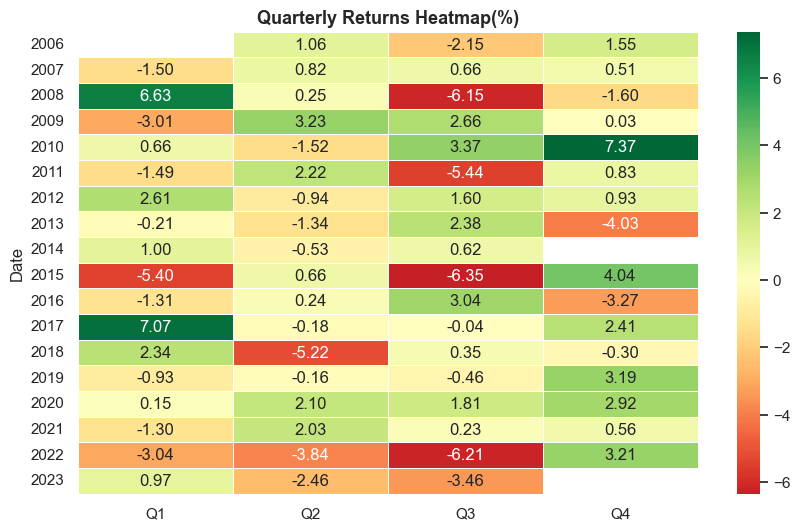

In [756]:
sns.set(style="white")
center_value = 0
plt.figure(figsize=(10, 6))
merged_returns_quarterly_per = merged_returns_quarterly * 100
sns.heatmap(merged_returns_quarterly_per, cmap='RdYlGn', annot=True, fmt=".2f", linewidths=.5, center=center_value)
plt.title('Quarterly Returns Heatmap(%)', fontsize=13, fontweight='bold')
plt.show()

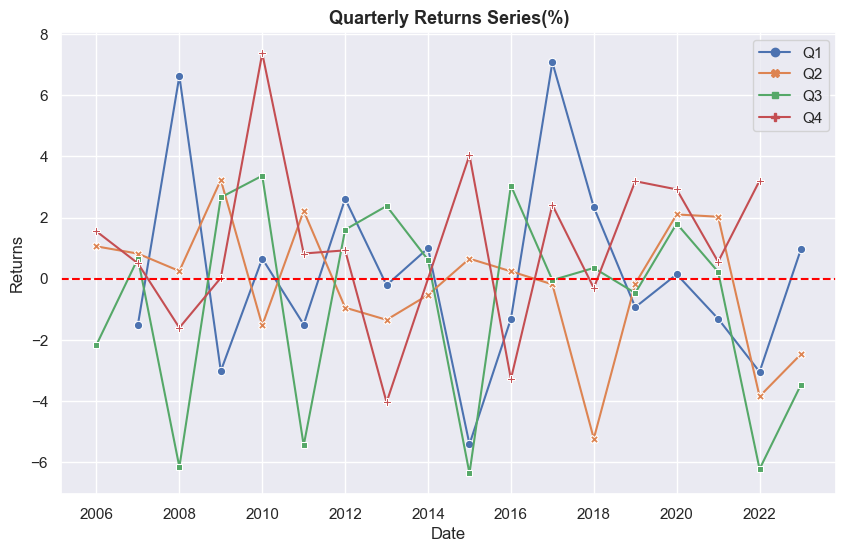

In [757]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_returns_quarterly_per, markers=True, dashes=False)
plt.xticks(range(0, len(merged_returns_quarterly_per.index), 1*2), merged_returns_quarterly_per.index[::1*2])
plt.axhline(y=0.000, color='red', linestyle='--', label='Initial Value')
plt.title('Quarterly Returns Series(%)', fontsize=13, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

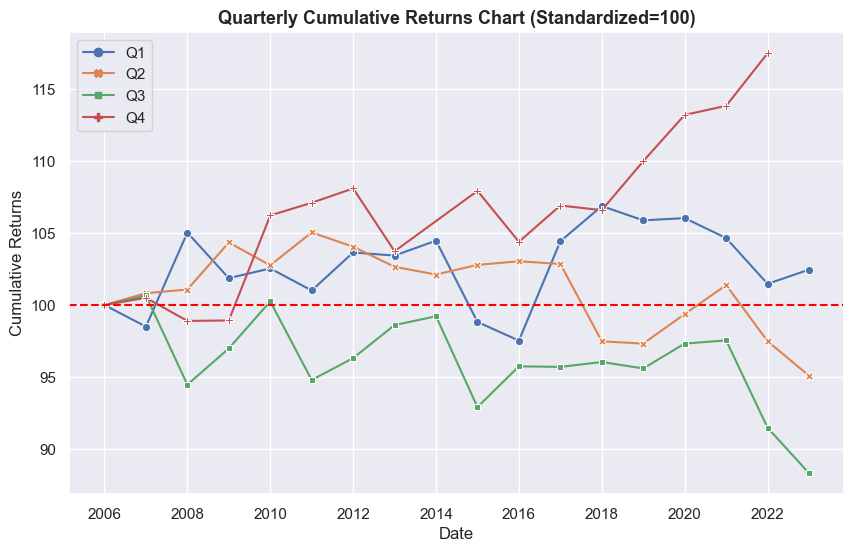

In [758]:
sns.set(style="darkgrid")
merged_returns_quarterly_subset = merged_returns_quarterly.copy()
merged_returns_quarterly_subset.iloc[0, :] = 99
cumulative_returns_quarterly = (merged_returns_quarterly_subset + 1).cumprod()

plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_returns_quarterly, markers=True, dashes=False)
plt.xticks(range(0, len(cumulative_returns_quarterly.index), 1*2), cumulative_returns_quarterly.index[::1*2])
plt.axhline(y=100, color='red', linestyle='--', label='Initial Value')
plt.title('Quarterly Cumulative Returns Chart (Standardized=100)', fontsize=13, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

In [759]:
average_returns = merged_returns_quarterly.mean()
average_returns_percent = average_returns * 100
average_returns_percent = pd.DataFrame(average_returns_percent)
median_returns = merged_returns_quarterly.median()
median_returns_percent = median_returns * 100
median_returns_percent = pd.DataFrame(median_returns_percent)
merged_returns = pd.concat([average_returns_percent, median_returns_percent], axis=1)
merged_returns.columns = ['Average Returns(%)', 'Median Returns(%)']
merged_returns

,Average Returns(%),Median Returns(%)
Q1,0.190582,-0.206335
Q2,-0.198494,0.041227
Q3,-0.752660,0.291427
Q4,1.145587,0.878425


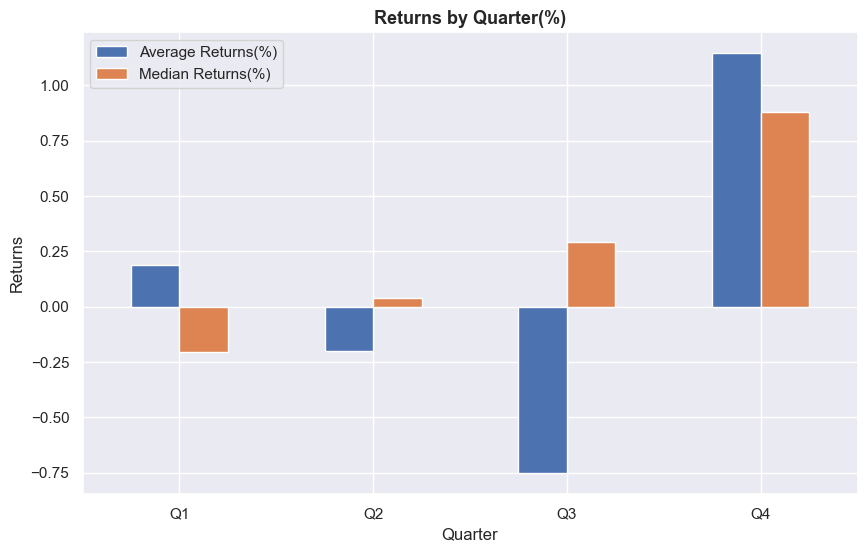

In [760]:
sns.set(style="darkgrid")
merged_returns.plot(kind='bar', figsize=(10, 6))
plt.xticks(range(len(merged_returns.index)), merged_returns.index, rotation=0)
plt.title('Returns by Quarter(%)', fontsize=13, fontweight='bold')
plt.xlabel('Quarter')
plt.ylabel('Returns')
plt.show()

Monthly Analysis

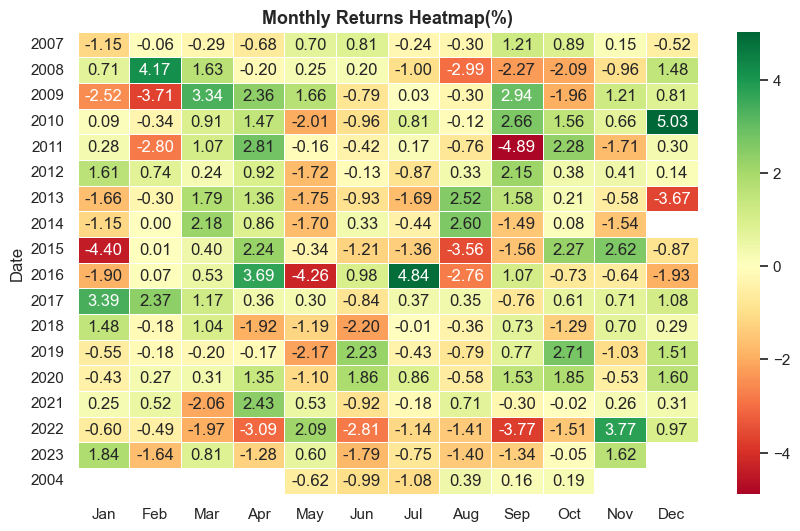

In [761]:
sns.set(style="white")
center_value = 0
plt.figure(figsize=(10, 6))
merged_returns_monthly_per = merged_returns_monthly * 100
sns.heatmap(merged_returns_monthly_per, cmap='RdYlGn', annot=True, fmt=".2f", linewidths=.5, center=center_value)
plt.title('Monthly Returns Heatmap(%)', fontsize=13, fontweight='bold')
plt.show()

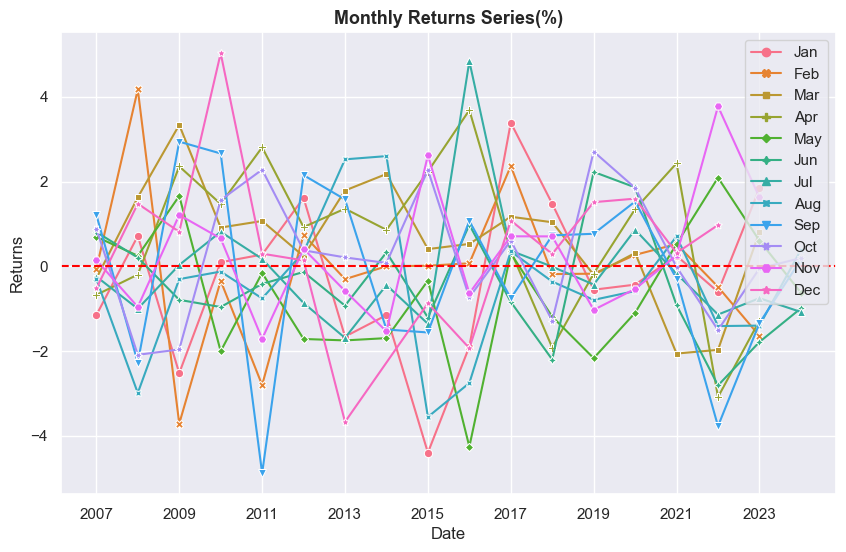

In [762]:
sns.set(style="darkgrid")
plt.figure(figsize=(10, 6))
sns.lineplot(data=merged_returns_monthly_per, markers=True, dashes=False)
plt.xticks(range(0, len(merged_returns_monthly_per.index), 1*2), merged_returns_monthly_per.index[::1*2])
plt.axhline(y=0.000, color='red', linestyle='--', label='Initial Value')
plt.title('Monthly Returns Series(%)',  fontsize=13, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Returns')
plt.show()

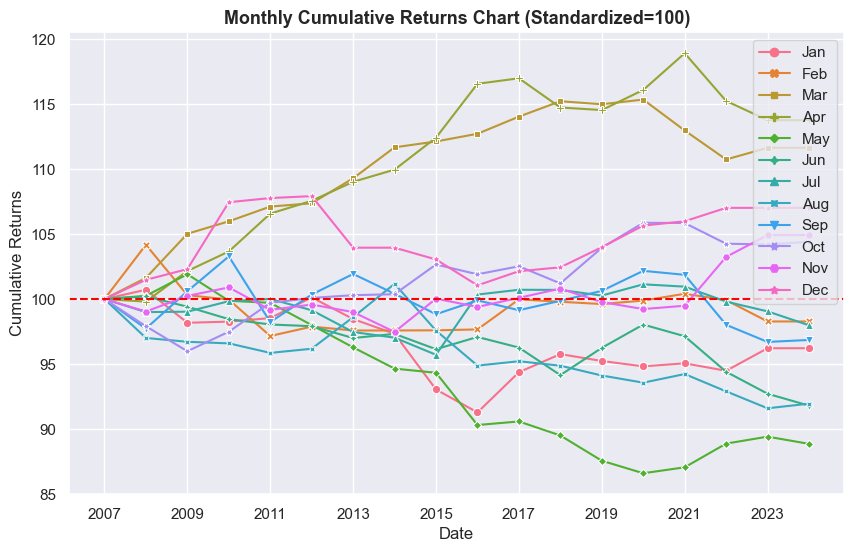

In [763]:
merged_returns_monthly_filled = merged_returns_monthly.fillna(0)
merged_returns_monthly_subset = merged_returns_monthly_filled.copy()
merged_returns_monthly_subset.iloc[0, :] = 99
cumulative_returns_monthly = (merged_returns_monthly_subset + 1).cumprod()
plt.figure(figsize=(10, 6))
sns.lineplot(data=cumulative_returns_monthly, markers=True, dashes=False)
plt.xticks(range(0, len(cumulative_returns_monthly.index), 1*2), cumulative_returns_monthly.index[::1*2])
plt.axhline(y=100, color='red', linestyle='--', label='Initial Value')
plt.title('Monthly Cumulative Returns Chart (Standardized=100)', fontsize=13, fontweight='bold')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

In [764]:
average_returns_monthly = merged_returns_monthly.mean()
average_returns_percent_monthly = average_returns_monthly * 100
average_returns_percent_monthly = pd.DataFrame(average_returns_percent_monthly)
median_returns_monthly = merged_returns_monthly.median()
median_returns_percent_monthly = median_returns_monthly * 100
median_returns_percent_monthly = pd.DataFrame(median_returns_percent_monthly)
merged_returns_monthly_df = pd.concat([average_returns_percent_monthly, median_returns_percent_monthly], axis=1)
merged_returns_monthly_df.columns = ['Average Returns(%)', 'Meidan Returns(%)']
merged_returns_monthly_df

,Average Returns(%),Meidan Returns(%)
Jan,-0.278346,-0.433707
Feb,-0.091487,-0.060641
Mar,0.640614,0.809834
Apr,0.735940,0.924346
May,-0.603927,-0.479256
Jun,-0.421375,-0.816284
Jul,-0.117195,-0.337583
Aug,-0.468967,-0.332864
Sep,-0.088163,0.442338
Oct,0.298873,0.200875


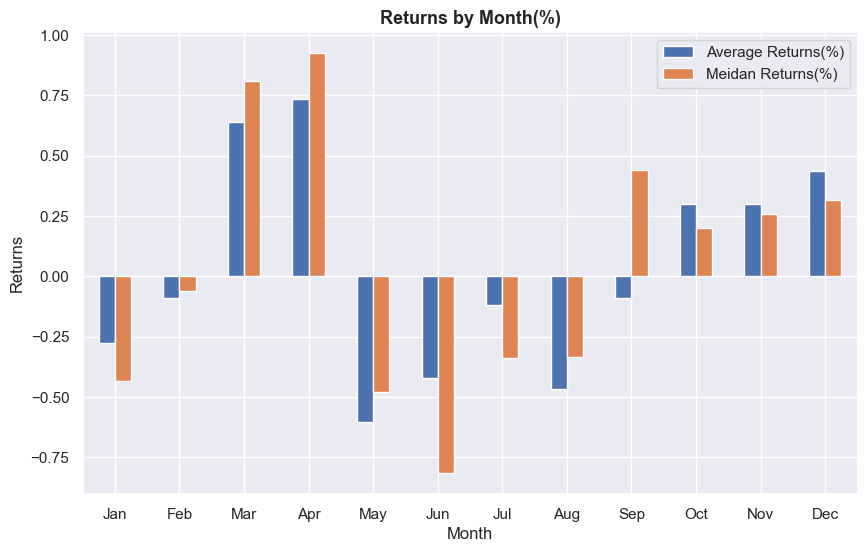

In [765]:
sns.set(style="darkgrid")
merged_returns_monthly_df.plot(kind='bar', figsize=(10, 6))
plt.xticks(range(len(merged_returns_monthly_df.index)), merged_returns_monthly_df.index, rotation=0)
plt.title('Returns by Month(%)', fontsize=13, fontweight='bold')
plt.xlabel('Month')
plt.ylabel('Returns')
plt.show()

In [766]:
cpu_usage = psutil.cpu_percent(interval=1)
memory = psutil.virtual_memory()
total_memory = round(memory.total / (1024 ** 3), 2)  
available_memory = round(memory.available / (1024 ** 3), 2)  
disk_usage = psutil.disk_usage('/')
total_disk_space = round(disk_usage.total / (1024 ** 3), 2)  
used_disk_space = round(disk_usage.used / (1024 ** 3), 2)  
network = psutil.net_io_counters()
sent_bytes = round(network.bytes_sent / (1024 ** 2), 2)  
received_bytes = round(network.bytes_recv / (1024 ** 2), 2)  

print('CPU Usage:', cpu_usage, '%')
print('Total Memory:', total_memory, 'GB')
print('Available Memory:', available_memory, 'GB')
print('Total Disk Space:', total_disk_space, 'GB')
print('Used Disk Space:', used_disk_space, 'GB')
print('Sent Bytes:', sent_bytes, 'MB')
print('Received Bytes:', received_bytes, 'MB')

CPU Usage: 16.4 %
Total Memory: 8.0 GB
Available Memory: 1.34 GB
Total Disk Space: 228.27 GB
Used Disk Space: 9.28 GB
Sent Bytes: 4142.23 MB
Received Bytes: 34155.18 MB
